# Health Conditions Contributing to COVID-19 Deaths, Age, Provisional 2020-2023 in USA

### Background:
### COVID-19 (coronavirus disease 2019) is a disease caused by a virus named SARS-CoV-2 and was discovered in December 2019 in Wuhan, China. It is very contagious and has quickly spread around the world. COVID-19 most often causes respiratory symptoms that can feel much like a cold, a flu, or pneumonia.

#### Objective:
#### The main goal of this data-analysis is to compare the result obtained in main project with a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

#### Data-set Content:
#### •	Data As Of: Date of analysis
#### •	Start Date: First week-ending date of data period
#### •	End Date: Last week-ending date of data period
#### •	Group: Time-period indicator for record: by Month, by Year, Total
#### •	Year: Year in which death occurred
#### •	Month: Month in which death occurred
#### •	State: Jurisdiction of occurrence
#### •	Condition Group: Condition Group
#### •	Condition: Condition contributing to deaths involving COVID-19
#### •	ICD10_codes: ICD-10 code for condition
#### •	Age Group: Age group
#### •	COVID-19 Deaths: COVID 19 Deaths
#### •	Number of Mentions: Number of mentions
#### •	Flag: Counts less than 10 supressed


#### Source: https://data.cdc.gov/NCHS/Conditions-Contributing-to-COVID-19-Deaths-by-Stat/hk9y-quqm

#### file name: Conditions_Contributing_to_COVID-19_Deaths__by_State_and_Age__Provisional_2020-2023.csv

### Import our dependencies & Data importing: 

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from pathlib import Path
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import pandas as pd
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import locale
from locale import atof

import warnings
warnings.filterwarnings('ignore')


In [2]:
#  Import and read the CDC_data.csv.
import pandas as pd 
df = pd.read_csv("CDC_data.csv")
df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
0,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,"1,501","1,571",NaN
1,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,25-34,"5,720","5,937",NaN
2,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,35-44,"14,918","15,534",NaN
3,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,45-54,"37,069","38,520",NaN
4,02/19/2023,01/01/2020,02/18/2023,By Total,NaN,NaN,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,55-64,"81,678","84,660",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534055,02/19/2023,10/01/2022,10/31/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
534056,02/19/2023,11/01/2022,11/30/2022,By Month,"2,022",11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
534057,02/19/2023,12/01/2022,12/31/2022,By Month,"2,022",12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,167.0,167.0,NaN
534058,02/19/2023,01/01/2023,01/31/2023,By Month,"2,023",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,154.0,154.0,NaN


In [3]:
# Filter the Group column by Year
byyear_df = df.loc[(df['Group'] == "By Month")]
byyear_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
62100,02/19/2023,01/01/2020,01/31/2020,By Month,"2,020",1.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
62101,02/19/2023,02/01/2020,02/29/2020,By Month,"2,020",2.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
62102,02/19/2023,03/01/2020,03/31/2020,By Month,"2,020",3.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,9,9,NaN
62103,02/19/2023,04/01/2020,04/30/2020,By Month,"2,020",4.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,27,30,NaN
62104,02/19/2023,05/01/2020,05/31/2020,By Month,"2,020",5.0,United States,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,19,19,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534055,02/19/2023,10/01/2022,10/31/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
534056,02/19/2023,11/01/2022,11/30/2022,By Month,"2,022",11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
534057,02/19/2023,12/01/2022,12/31/2022,By Month,"2,022",12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,167.0,167.0,NaN
534058,02/19/2023,01/01/2023,01/31/2023,By Month,"2,023",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,154.0,154.0,NaN


In [4]:
# Filter the State for United States 
byyear_US_df = byyear_df.loc[(byyear_df['State'] != "United States")]
byyear_US_df.head()

,Data As Of,Start Date,End Date,Group,Year,Month,State,Condition Group,Condition,ICD10_codes,Age Group,COVID-19 Deaths,Number of Mentions,Flag
70840,02/19/2023,01/01/2020,01/31/2020,By Month,"2,020",1.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
70841,02/19/2023,02/01/2020,02/29/2020,By Month,"2,020",2.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
70842,02/19/2023,03/01/2020,03/31/2020,By Month,"2,020",3.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
70843,02/19/2023,04/01/2020,04/30/2020,By Month,"2,020",4.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
70844,02/19/2023,05/01/2020,05/31/2020,By Month,"2,020",5.0,Alabama,Respiratory diseases,Influenza and pneumonia,J09-J18,0-24,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534055,02/19/2023,10/01/2022,10/31/2022,By Month,"2,022",10.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,117.0,117.0,NaN
534056,02/19/2023,11/01/2022,11/30/2022,By Month,"2,022",11.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,124.0,124.0,NaN
534057,02/19/2023,12/01/2022,12/31/2022,By Month,"2,022",12.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,167.0,167.0,NaN
534058,02/19/2023,01/01/2023,01/31/2023,By Month,"2,023",1.0,Puerto Rico,COVID-19,COVID-19,U071,All Ages,154.0,154.0,NaN


In [5]:
# Drop the unwanted columns for data-analysis 'Data As Of','Start Date','End Date','Group','Month','Condition','ICD10_codes','Number of Mentions','Flag'
byyear_US_df=byyear_US_df.drop(byyear_US_df[['Data As Of','Start Date','End Date','Group','Month','State','Condition Group','ICD10_codes','Number of Mentions','Flag']], axis=1)
byyear_US_df.head()

,Year,Condition,Age Group,COVID-19 Deaths
70840,"2,020",Influenza and pneumonia,0-24,0
70841,"2,020",Influenza and pneumonia,0-24,0
70842,"2,020",Influenza and pneumonia,0-24,0
70843,"2,020",Influenza and pneumonia,0-24,0
70844,"2,020",Influenza and pneumonia,0-24,0


In [6]:
# check if any cell has NaN value
byyear_US_df.isna().sum()

Year                    0
Condition               0
Age Group               0
COVID-19 Deaths    144072
dtype: int64

In [9]:
# drop all nan values
byyear_US_df.dropna(subset=['COVID-19 Deaths'], inplace=True)
byyear_US_df.isna().sum()

Year               0
Condition          0
Age Group          0
COVID-19 Deaths    0
dtype: int64

In [12]:
# Filtered out the "Not stated" raw from the dataset
byyear_US_df = byyear_US_df.loc[(byyear_US_df['Age Group'] != "Not stated")]


,Year,Condition,Age Group,COVID-19 Deaths
70840,"2,020",Influenza and pneumonia,0-24,0
70841,"2,020",Influenza and pneumonia,0-24,0
70842,"2,020",Influenza and pneumonia,0-24,0
70843,"2,020",Influenza and pneumonia,0-24,0
70844,"2,020",Influenza and pneumonia,0-24,0
...,...,...,...,...
534055,"2,022",COVID-19,All Ages,117.0
534056,"2,022",COVID-19,All Ages,124.0
534057,"2,022",COVID-19,All Ages,167.0
534058,"2,023",COVID-19,All Ages,154.0


In [13]:
# Filtered out the "All Ages" raw from the dataset
byyear_US_df = byyear_US_df.loc[(byyear_US_df['Age Group'] != "All Ages")]
byyear_US_df.head()

,Year,Condition,Age Group,COVID-19 Deaths
70840,"2,020",Influenza and pneumonia,0-24,0
70841,"2,020",Influenza and pneumonia,0-24,0
70842,"2,020",Influenza and pneumonia,0-24,0
70843,"2,020",Influenza and pneumonia,0-24,0
70844,"2,020",Influenza and pneumonia,0-24,0
...,...,...,...,...
533979,"2,022",COVID-19,85+,51.0
533980,"2,022",COVID-19,85+,55.0
533981,"2,022",COVID-19,85+,68.0
533982,"2,023",COVID-19,85+,70.0


In [14]:
# Rename the column 'Age Group' to 'AgeGroup'
byyear_US_df.rename(columns = {'Age Group':'AgeGroup'}, inplace = True)
byyear_US_df.columns

Index(['Year', 'Condition', 'AgeGroup', 'COVID-19 Deaths'], dtype='object')

In [15]:
# Rename the column 'COVID-19 Deaths' to 'Deaths'
byyear_US_df.rename(columns = {'COVID-19 Deaths':'Deaths'}, inplace = True)
byyear_US_df.columns

Index(['Year', 'Condition', 'AgeGroup', 'Deaths'], dtype='object')

In [18]:
# Determine the number of unique values in each column.
byyear_US_df.nunique()

Year            4
Condition      23
AgeGroup        8
Deaths       1072
dtype: int64

In [21]:
# Look at CONDITION_TYPE value counts for binning

condition_count = byyear_US_df.Condition.value_counts()
condition_count

Alzheimer disease                                                            12782
Vascular and unspecified dementia                                            12634
Respiratory arrest                                                           11465
COVID-19                                                                     11149
Cardiac arrhythmia                                                           10707
Ischemic heart disease                                                       10576
Respiratory failure                                                          10571
Influenza and pneumonia                                                      10562
Hypertensive diseases                                                        10538
Heart failure                                                                10507
Chronic lower respiratory diseases                                           10221
Cerebrovascular diseases                                                     10191
All 

In [22]:
# Check the columns data type
byyear_US_df.dtypes


Year         object
Condition    object
AgeGroup     object
Deaths       object
dtype: object

In [27]:
byyear_US_df['Deaths'] = byyear_US_df['Deaths'].str.replace(',','').astype(float)
byyear_US_df.head()

,Year,Condition,AgeGroup,Deaths
70840,"2,020",Influenza and pneumonia,0-24,0.0
70841,"2,020",Influenza and pneumonia,0-24,0.0
70842,"2,020",Influenza and pneumonia,0-24,0.0
70843,"2,020",Influenza and pneumonia,0-24,0.0
70844,"2,020",Influenza and pneumonia,0-24,0.0
...,...,...,...,...
533979,"2,022",COVID-19,85+,NaN
533980,"2,022",COVID-19,85+,NaN
533981,"2,022",COVID-19,85+,NaN
533982,"2,023",COVID-19,85+,NaN


In [29]:
# drop all nan values
byyear_US_df.dropna(subset=['Deaths'], inplace=True)
byyear_US_df.isna().sum()

Year         0
Condition    0
AgeGroup     0
Deaths       0
dtype: int64

In [31]:
# Check the data types
byyear_US_df.dtypes


Year          object
Condition     object
AgeGroup      object
Deaths       float64
dtype: object

In [33]:
# Group the Health condition_Group with Death 
byyear_US_aggregated = byyear_US_df.groupby("Condition").sum().sort_values('Deaths',ascending=True)
byyear_US_aggregated

,Deaths
Condition,
Respiratory arrest,11401.0
"Intentional and unintentional injury, poisoning, and other adverse events",12300.0
Alzheimer disease,23891.0
Obesity,34492.0
Other diseases of the respiratory system,37978.0
Cerebrovascular diseases,40185.0
Malignant neoplasms,47435.0
Other diseases of the circulatory system,64593.0
Cardiac arrhythmia,71784.0


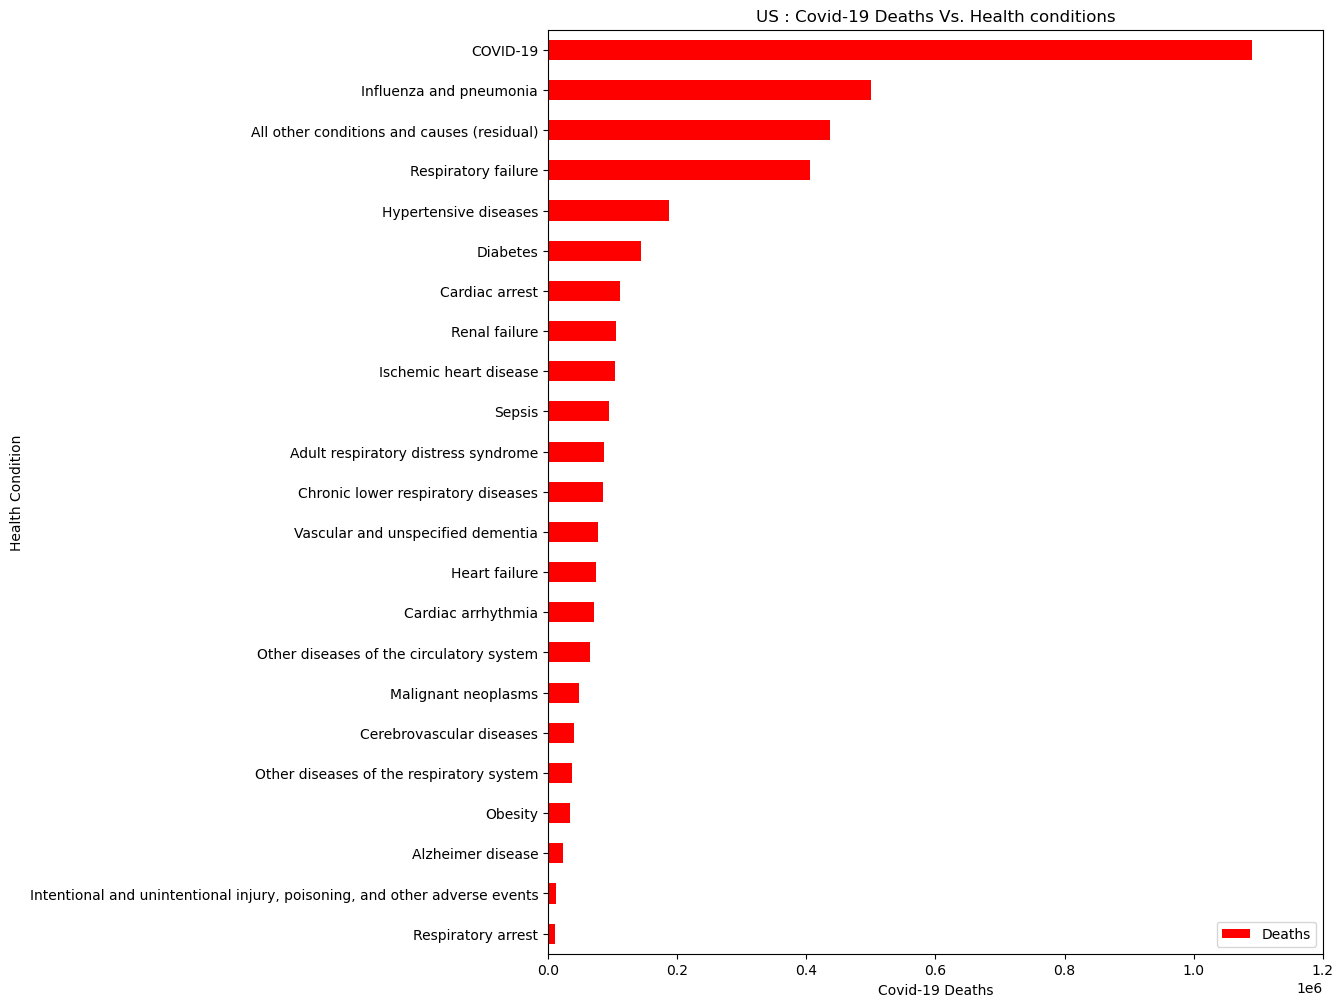

<Figure size 2000x1500 with 0 Axes>

In [34]:
# Plot the US : Covid-19 Death Vs. Health conditions
byyear_US_aggregated.plot.barh(color='red',xlim=(0,1200000), figsize=(10,12),stacked=True)
plt.xticks(rotation=0)

plt.ylabel("Health Condition")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Health conditions")
plt.legend()
plt.figure(figsize=(20, 15))
plt.show()



In [35]:
# Group the Health Condition & Age_Group  with Death 
byyear_US_aggr = byyear_US_df.groupby(['Condition', 'AgeGroup']).agg({'Deaths':sum}).sort_values('Deaths',ascending=True)
byyear_US_aggr

Deaths
Condition                                AgeGroup          
Malignant neoplasms                      0-24           0.0
Vascular and unspecified dementia        0-24           0.0
                                         25-34          0.0
Other diseases of the circulatory system 0-24           0.0
Cardiac arrhythmia                       0-24           0.0
...                                                     ...
Influenza and pneumonia                  75-84     132785.0
COVID-19                                 55-64     154625.0
                                         65-74     248368.0
                                         75-84     287411.0
                                         85+       296514.0

[184 rows x 1 columns]

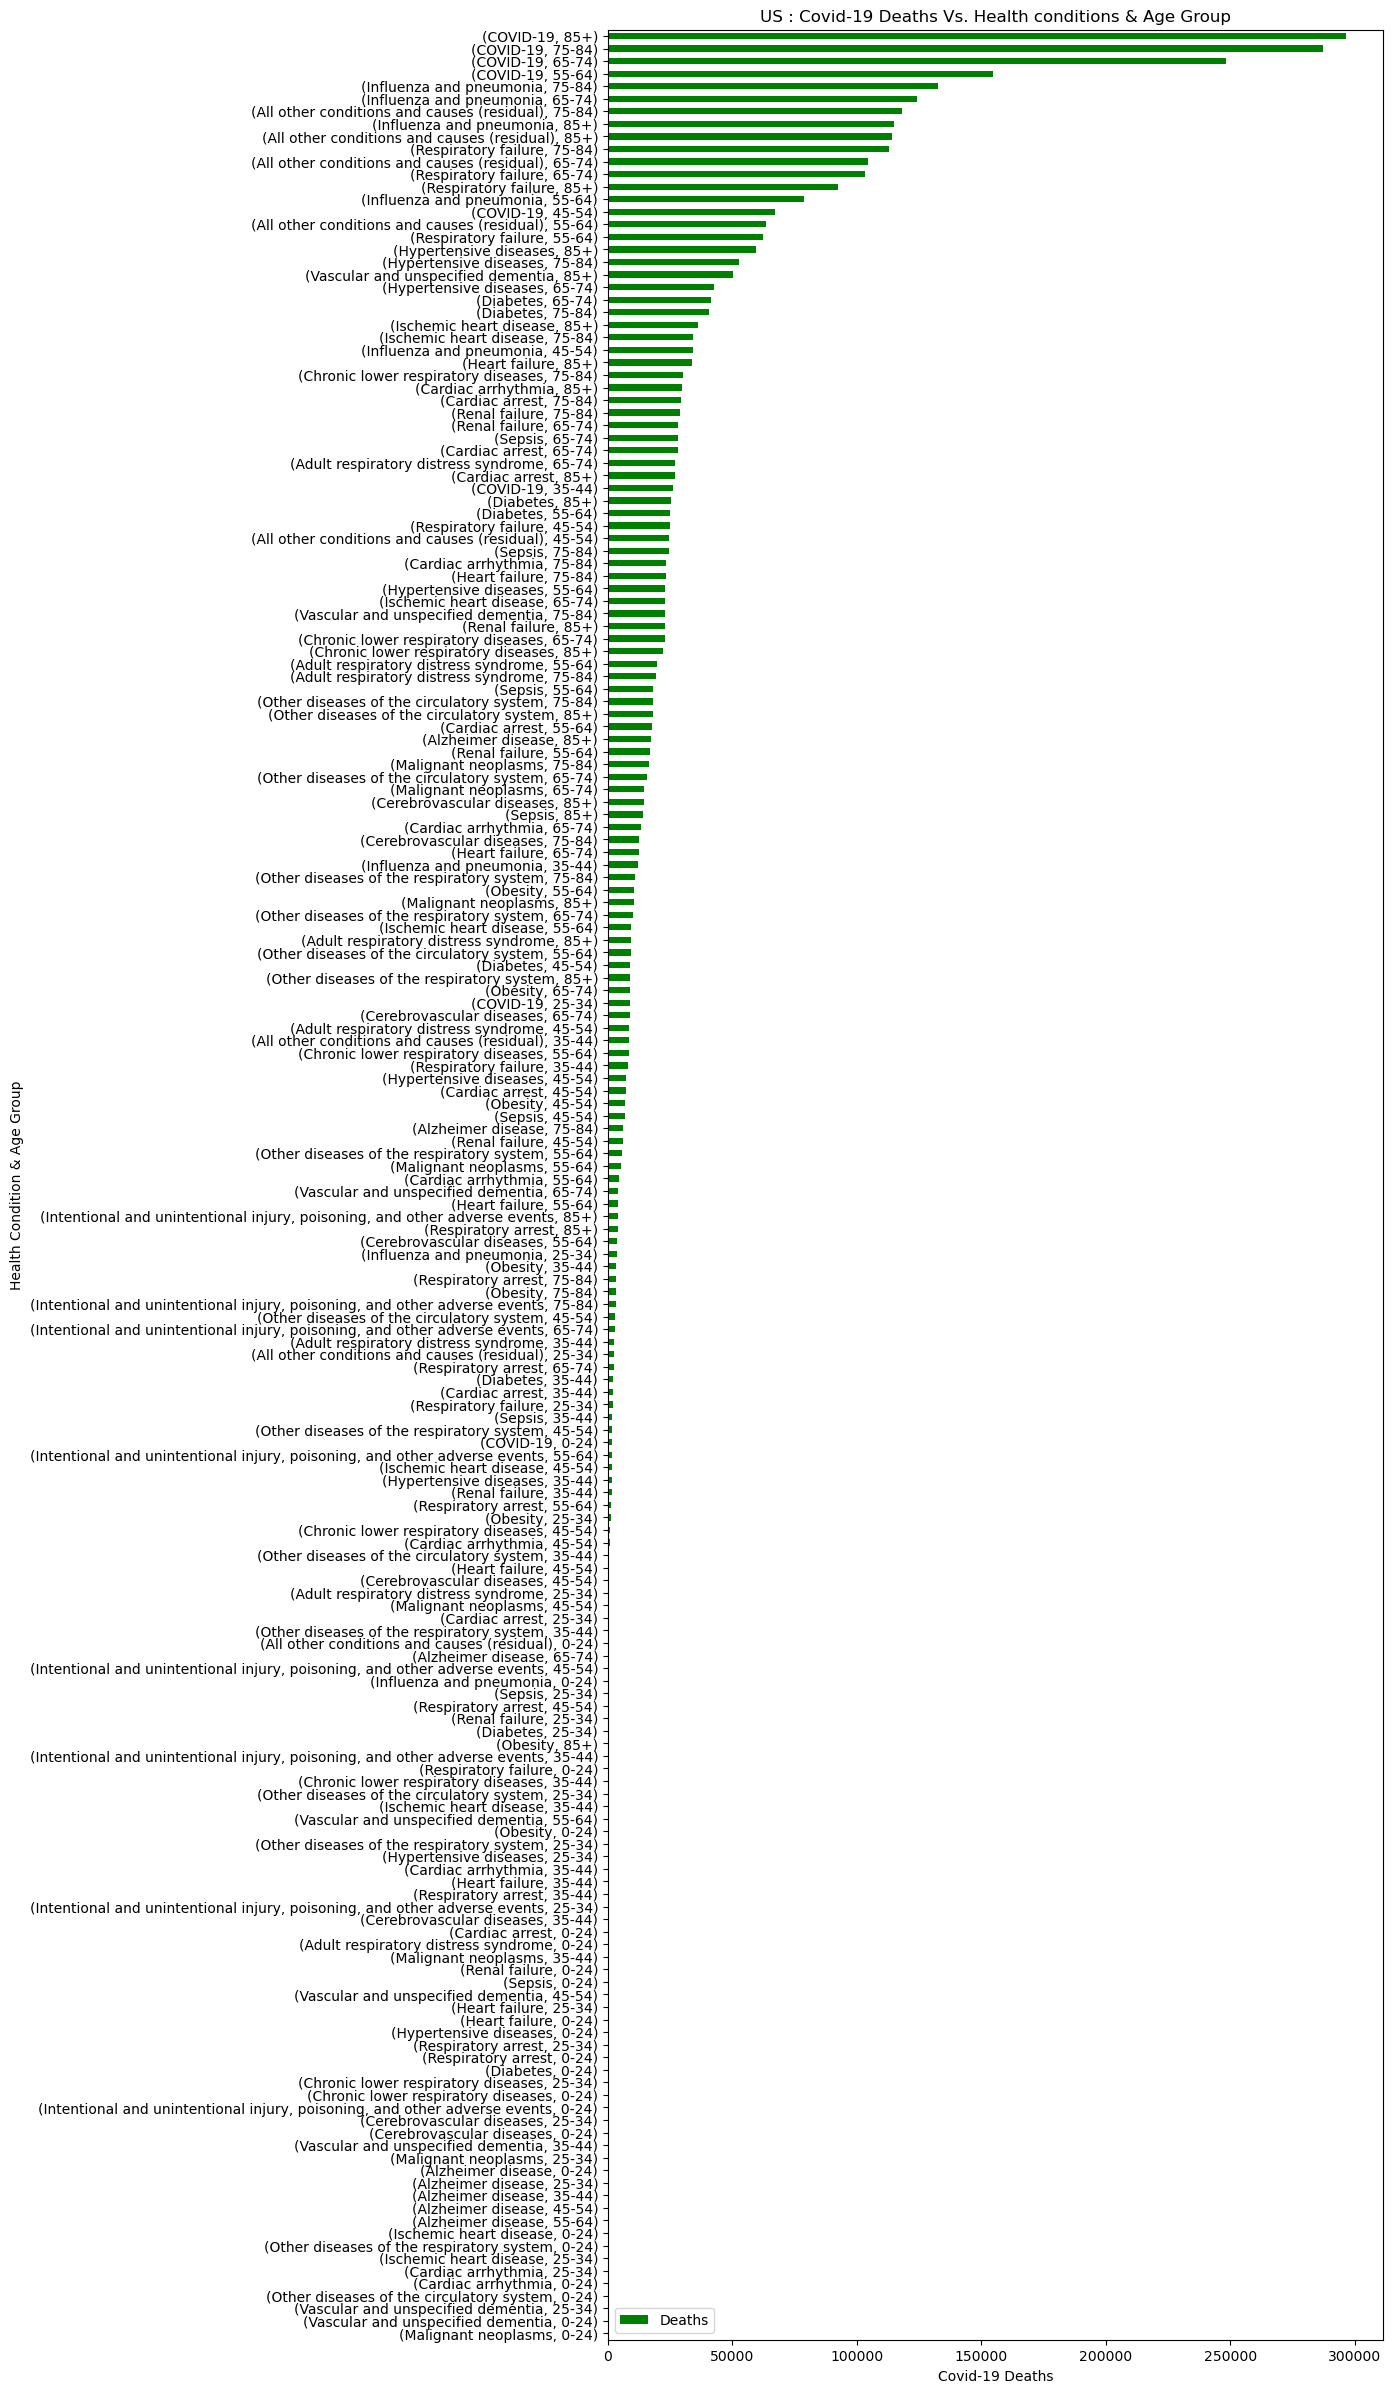

In [36]:
# Plot the US : Covid-19 Death Vs. Health conditions
byyear_US_aggr.plot.barh(color='green',figsize=(10,30))

plt.ylabel("Health Condition & Age Group")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Health conditions & Age Group")
plt.legend()
plt.show()

In [37]:
# Group the Age_Group  with Death 
byyear_US_age = byyear_US_df.groupby(['AgeGroup']).agg({'Deaths':sum}).sort_values('Deaths',ascending=True)
byyear_US_age

,Deaths
AgeGroup,
0-24,2828.0
25-34,20266.0
35-44,71368.0
45-54,213062.0
55-64,543237.0
65-74,915578.0
85+,1026014.0
75-84,1054993.0


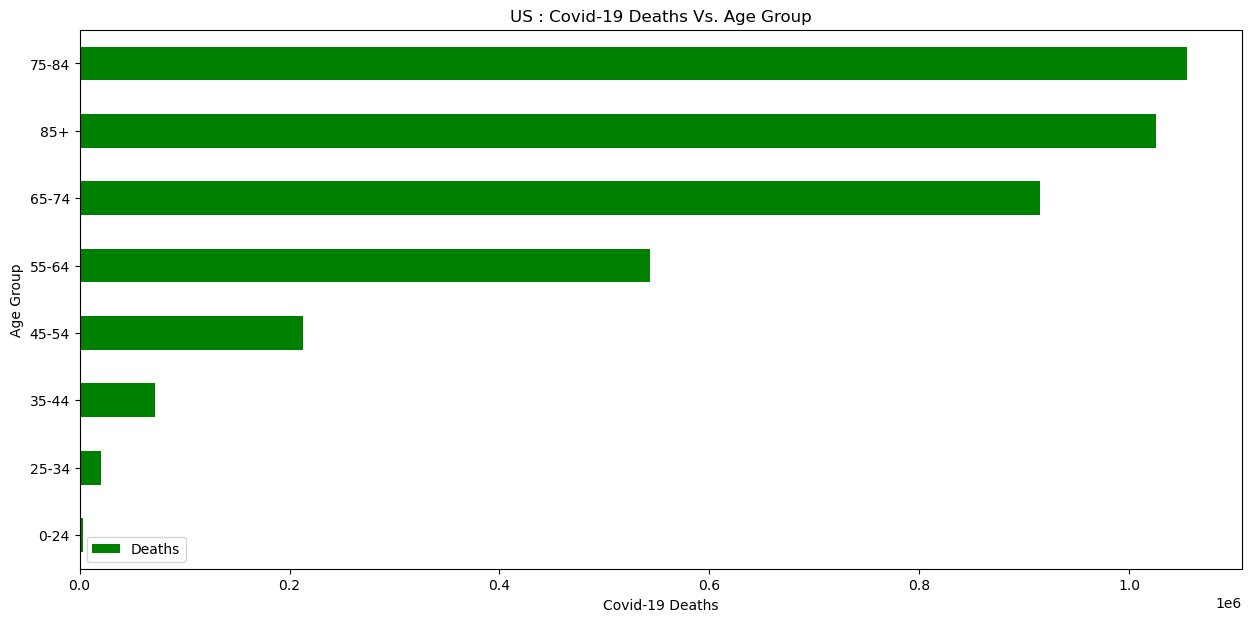

In [38]:
# Plot the US : Covid-19 Death Vs. Age Group
byyear_US_age.plot.barh(color='green',figsize=(15,7))

plt.ylabel("Age Group")
plt.xlabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Age Group")
plt.legend()
plt.show()

In [39]:
# Group the Year  with Death 
byyear_US_year = byyear_US_df.groupby(['Year']).agg({'Deaths':sum}).sort_values('Year')
byyear_US_year

,Deaths
Year,
"2,020",1323445.0
"2,021",1634686.0
"2,022",839983.0
"2,023",49232.0


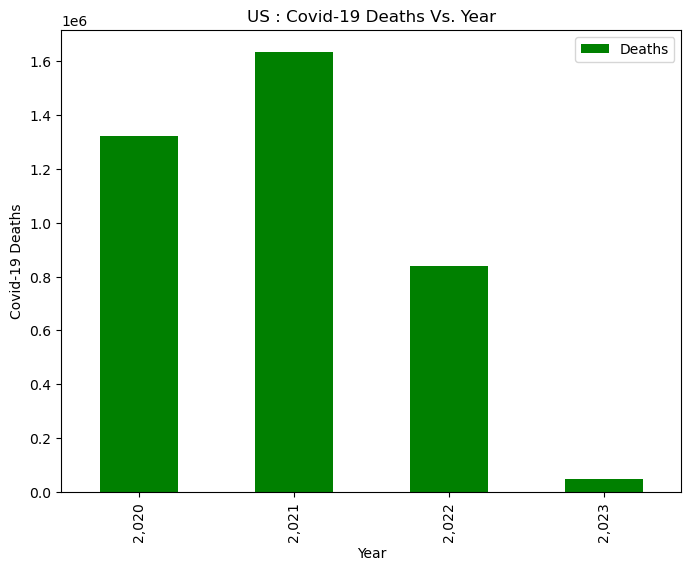

In [40]:
# Plot the US : Covid-19 Death Vs. Year
byyear_US_year.plot.bar(color='green',figsize=(8,6))

plt.xlabel("Year")
plt.ylabel("Covid-19 Deaths")
plt.title("US : Covid-19 Deaths Vs. Year")
plt.legend()
plt.show()

In [41]:
# Generate our categorical variable lists

covid_cat = byyear_US_df.dtypes[byyear_US_df.dtypes == "object"].index.tolist()
covid_cat

['Year', 'Condition', 'AgeGroup']

In [42]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(byyear_US_df[covid_cat]))


In [43]:
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(covid_cat)
encode_df

,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",Condition_Adult respiratory distress syndrome,Condition_All other conditions and causes (residual),Condition_Alzheimer disease,Condition_COVID-19,Condition_Cardiac arrest,Condition_Cardiac arrhythmia,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233861,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233862,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233863,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233864,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Reset the index on Byyear_df dataset
byyear_US_df = byyear_US_df.reset_index(drop=True)
byyear_US_df

,Year,Condition,AgeGroup,Deaths
0,"2,020",Influenza and pneumonia,0-24,0.0
1,"2,020",Influenza and pneumonia,0-24,0.0
2,"2,020",Influenza and pneumonia,0-24,0.0
3,"2,020",Influenza and pneumonia,0-24,0.0
4,"2,020",Influenza and pneumonia,0-24,0.0
...,...,...,...,...
233861,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0
233862,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0
233863,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0
233864,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0


In [46]:
# Merge the datasets
byyear_US_df = byyear_US_df.merge(encode_df,left_index=True, right_index=True)
byyear_US_df

,Year,Condition,AgeGroup,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",Condition_Adult respiratory distress syndrome,Condition_All other conditions and causes (residual),...,Condition_Sepsis,Condition_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,"2,020",Influenza and pneumonia,0-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"2,020",Influenza and pneumonia,0-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"2,020",Influenza and pneumonia,0-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"2,020",Influenza and pneumonia,0-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"2,020",Influenza and pneumonia,0-24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233861,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233862,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233863,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233864,"2,022","Intentional and unintentional injury, poisonin...",35-44,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [47]:
covid_cat

['Year', 'Condition', 'AgeGroup']

In [48]:
byyear_US_df = byyear_US_df.drop(covid_cat, axis=1)
byyear_US_df

,Deaths,"Year_2,020","Year_2,021","Year_2,022","Year_2,023",Condition_Adult respiratory distress syndrome,Condition_All other conditions and causes (residual),Condition_Alzheimer disease,Condition_COVID-19,Condition_Cardiac arrest,...,Condition_Sepsis,Condition_Vascular and unspecified dementia,AgeGroup_0-24,AgeGroup_25-34,AgeGroup_35-44,AgeGroup_45-54,AgeGroup_55-64,AgeGroup_65-74,AgeGroup_75-84,AgeGroup_85+
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233861,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233862,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233863,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
233864,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.model_selection import train_test_split

# Split our preprocessed data into our features and target arrays

y = byyear_US_df.Deaths.values
X = byyear_US_df.drop(columns=["Deaths"]).values

In [50]:
# Split the preprocessed data into a training and testing dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [51]:
# Create a StandardScaler instance
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [52]:
# Determine the shape of our training and testing sets.
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(175399, 35)
(58467, 35)
(175399,)
(58467,)


In [53]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Compile, Train and Evaluate the Model - RandomForestClassifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)



 Random forest predictive accuracy: 0.711


In [56]:
# Validate the model by using the training data
print(f"Training Data Score: {rf_model.score(X_train, y_train)}")

Training Data Score: 0.7120679137281284


In [57]:
# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.711


 ## Create a SVM Model 

In [79]:
# Instantiate a linear SVM model
from sklearn.svm import SVC
model = SVC(kernel='linear')


## Fit (train) or model using the training data

In [80]:
# Fit the data
model.fit(X_train, y_train)

SVC(kernel='linear')

 ## Score the model using the test data

 ## Make predictions

In [81]:
# Make predictions using the test data
y_pred = model.predict(X_test)
results = pd.DataFrame({
    "Prediction": y_pred, 
    "Actual": y_test
}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7110848854909607

In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[41575,     0,     0, ...,     0,     0,     0],
       [ 1040,     0,     0, ...,     0,     0,     0],
       [  919,     0,     0, ...,     0,     0,     0],
       ...,
       [    1,     0,     0, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0],
       [    1,     0,     0, ...,     0,     0,     0]], dtype=int64)

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.71      1.00      0.83     41575
        10.0       0.00      0.00      0.00      1040
        11.0       0.00      0.00      0.00       919
        12.0       0.00      0.00      0.00       783
        13.0       0.00      0.00      0.00       765
        14.0       0.00      0.00      0.00       646
        15.0       0.00      0.00      0.00       655
        16.0       0.00      0.00      0.00       524
        17.0       0.00      0.00      0.00       513
        18.0       0.00      0.00      0.00       459
        19.0       0.00      0.00      0.00       438
        20.0       0.00      0.00      0.00       395
        21.0       0.00      0.00      0.00       349
        22.0       0.00      0.00      0.00       333
        23.0       0.00      0.00      0.00       340
        24.0       0.00      0.00      0.00       284
        25.0       0.00      0.00      0.00       270
        26.0       0.00    